In [ ]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from encoder import inference as encoder

In [2]:
def load_wav(fpath:str):
    wav = librosa.load(str(fpath), sr=16000)[0]
    return wav / np.abs(wav).max() * 0.9

In [5]:
# Load Encoder model
with open('saved_models/default/encoder.pt', 'rb') as f:
    encoder.load_model(f)

Loaded encoder "saved_models/default/encoder.pt" trained to step 1564501


In [ ]:
# Load the audio files
# audio_files = ["samples/1320_00000.mp3", "samples/3575_00000.mp3", "samples/6829_00000.mp3"]
embeddings = [encoder.embed_utterance(encoder.preprocess_wav(load_wav(f))) for f in audio_files]
len(embeddings)

In [7]:
# Compute the pairwise similarity scores
similarity_matrix = np.inner(embeddings, embeddings)

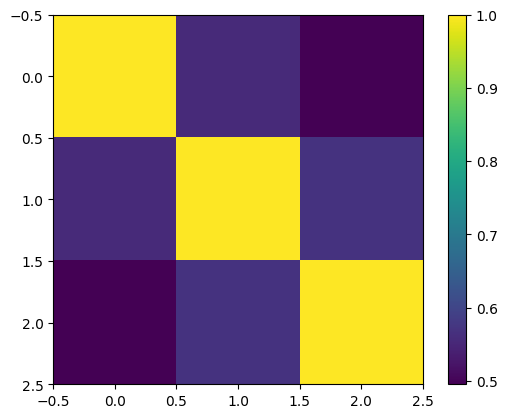

In [8]:
# Plot the heatmap
plt.imshow(similarity_matrix)
plt.colorbar()
plt.show()

In [9]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def plot_embeddings(embeddings):
    tsne = TSNE(n_components=2)
    reduced_embeddings = tsne.fit_transform(embeddings)
    x = reduced_embeddings[:, 0]
    y = reduced_embeddings[:, 1]
    plt.scatter(x, y)
    plt.show()

C:\Users\diago\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\diago\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


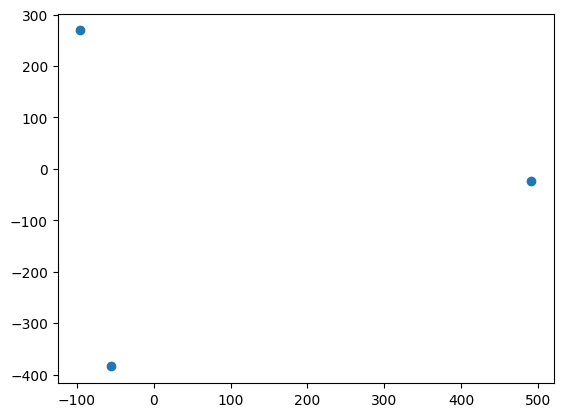

In [10]:
plot_embeddings(embeddings)

In [16]:
import os

folder_path = 'C:/Users/diago/Videos/data/data/wav/valid'
audio_files = []

for filename in os.listdir(folder_path):
    if filename.endswith('.wav'):
        audio_files.append(os.path.join(folder_path,filename))

print(len(audio_files),audio_files[0])

2780 C:/Users/diago/Videos/data/data/wav/valid\tr_dw_01_10001.wav
